#  <span style="color:orange">Final Project</span>

In [1]:
from pycaret.utils import version
version()

'2.2.1'

# 0.0 Configurar MLFlow

In [2]:
import mlflow
import os

# you can set your tracking server URI programmatically:
mlflow.set_tracking_uri('https://mlflow-aie3.ai.spglobal.com/')
os.environ['MLFLOW_S3_ENDPOINT_URL'] = 'https://minio-aie3.ai.spglobal.com/'
os.environ['LOGNAME'] = 'oswaldo'

# 1.0 Importar datos de entrenamiento

In [3]:
import pandas as pd
dataset = pd.read_csv("training6.csv")

/Users/oswaldo_gomez/Library/Caches/pypoetry/virtualenvs/time-series-CSagJmyP-py3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
dataset.dropna(inplace=True)

In [5]:
#check the shape of data
dataset.shape

/Users/oswaldo_gomez/Library/Caches/pypoetry/virtualenvs/time-series-CSagJmyP-py3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(50, 24)

In [6]:
dataset['Points'].describe()

count     50.000000
mean     114.820000
std       70.000493
min       14.000000
25%       44.750000
50%      121.500000
75%      170.500000
max      278.000000
Name: Points, dtype: float64

<AxesSubplot:>

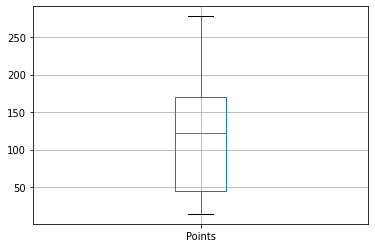

In [7]:
dataset.boxplot(column=['Points'])

## Convertimos la columna de punto de numérica a categórica, con dos categorías. Bueno y Malo. 

### Malo se define entre el valor mínimo teórico y la media. Bueno es entre la media y el valor máximo observado

In [8]:
bins=[0,89,278]
names=['Bad','Good']
dataset['Points_range']=pd.cut(dataset['Points'],bins,labels=names)

/Users/oswaldo_gomez/Library/Caches/pypoetry/virtualenvs/time-series-CSagJmyP-py3.7/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
dataset.sort_values(by='Points_range')

,duration,key,loudness,mode,tempo,artist_hotttnesss,end_of_fade_in,start_of_fade_out,mode_confidence,key_confidence,...,energy,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms,Points,Country,Points_range
22,159.35388,7,-5.995,1,131.958,0.06,0.00000,155.71883,0.786,0.908,...,0.635,0.0407,0.02730,0.000000,0.0942,0.240,159354,42.0,Portugal,Bad
34,178.88190,9,-5.376,0,84.966,0.06,0.12730,172.75645,0.569,0.571,...,0.642,0.0381,0.44500,0.000000,0.0773,0.308,178882,81.0,Israel,Bad
42,185.75693,5,-4.960,0,98.765,0.02,0.00000,177.50494,0.861,0.783,...,0.425,0.0330,0.84100,0.000047,0.1180,0.364,185757,38.0,Albania,Bad
30,176.35837,9,-8.693,1,122.053,0.02,0.00000,164.71655,0.329,0.205,...,0.449,0.0352,0.23100,0.000000,0.1030,0.177,176358,30.0,Serbia,Bad
29,182.84567,3,-5.678,1,125.983,0.06,0.11646,177.61523,0.535,0.469,...,0.775,0.0522,0.16800,0.000000,0.1040,0.427,182846,48.0,Ireland,Bad
45,182.44495,7,-4.457,1,119.945,0.11,0.48209,177.15665,0.679,0.413,...,0.548,0.0333,0.68600,0.000000,0.3090,0.411,182445,60.0,Poland,Bad
27,180.37003,2,-6.134,1,159.635,0.04,0.00000,172.69841,0.639,0.790,...,0.677,0.0389,0.34800,0.000000,0.0742,0.236,180370,47.0,Azerbaijan,Bad
46,182.50000,9,-4.764,0,192.041,0.02,0.34454,178.39311,0.425,0.454,...,0.731,0.0448,0.26400,0.000000,0.3210,0.392,182500,30.0,Ukraine,Bad
47,165.65565,8,-3.825,1,122.027,0.02,0.00000,158.78384,0.407,0.294,...,0.835,0.0919,0.11900,0.000000,0.1220,0.765,165656,14.0,Serbia,Bad
24,169.41710,8,-6.878,1,104.959,0.16,2.36844,163.82259,0.440,0.284,...,0.816,0.2000,0.04770,0.000008,0.1110,0.595,169417,44.0,Albania,Bad


# 2.0 Vamos a comenzar el experimento, en donde sólo utilizaremos las columnas no ignoradas (precedidas por un #, por ejempo #year no es ignorada. O lo que es lo mismo, es considerada)

## El objetivo es encontrar un modelo de aprendizaje automático que logre predecir la categoría de bueno/malo con base en año (categórico), bailable, energía y acustica de las canciones utilizando Spotify API get-audio-features y get-audio-analysis

In [10]:
from pycaret.classification import *
exp_mclf101 = setup(data = dataset,
                    target = 'Points_range',
                    session_id=123,
                    # Todas las columnas que tienen un hash (#), serán incluidas para el análisis
                    ignore_features=[#'duration',
                                     #'key',
                                     #'loudness',
                                     #'mode',
                                     #'tempo',
                                     #'artist_hotttnesss',
                                     'end_of_fade_in',
                                     'start_of_fade_out',
                                     'mode_confidence',                       
                                     'key_confidence',
                                     'time_signature',
                                     'time_signature_confidence',
                                     'year',
                                     #'popularity', 
                                     #'danceability',
                                     #'energy',
                                     #'speechiness',
                                     #'acousticness',
                                     #'instrumentalness',
                                     #'liveness',
                                     #'valence',
                                     'duration_ms',
                                     'Points',
                                     'Country',
                                     #'Points_range',
                                    ],
                    log_experiment=True,
                    experiment_name="Final_prediction_2",
                    log_plots=True,
                    log_data=True,
                    normalize=True,
                    remove_multicollinearity=True,
                    remove_outliers=True,
                    train_size=0.7,
                    feature_selection=True, 
                    pca=True,
                    pca_components=2,
                    profile=False,
                    use_gpu=True) 

,Description,Value
0,session_id,123
1,Target,Points_range
2,Target Type,Binary
3,Label Encoded,"Bad: 0, Good: 1"
4,Original Data,"(50, 25)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


# 3.0 Comparando múltiples modelos

## Vamos a ordenarlos de mayor a menor precisión

In [79]:
models={}

In [11]:
best = compare_models(sort='Precision')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6083,0.7250,0.5500,0.6833,0.5733,0.2000,0.2423,0.7460
nb,Naive Bayes,0.5250,0.4750,0.5000,0.6500,0.5333,0.1000,0.1077,0.0100
ridge,Ridge Classifier,0.5583,0.0000,0.6000,0.6500,0.6000,0.1000,0.1077,0.0090
rf,Random Forest Classifier,0.6000,0.7500,0.6000,0.6500,0.5833,0.2500,0.3000,0.8490
qda,Quadratic Discriminant Analysis,0.5250,0.5500,0.5000,0.6500,0.5333,0.1000,0.1077,0.0100
lda,Linear Discriminant Analysis,0.5583,0.5750,0.6000,0.6500,0.6000,0.1000,0.1077,0.0100
svm,SVM - Linear Kernel,0.5667,0.0000,0.6500,0.6333,0.6100,0.0900,0.1000,0.0090
lr,Logistic Regression,0.5333,0.5750,0.6000,0.6000,0.5833,0.0500,0.0500,0.0120
knn,K Neighbors Classifier,0.5000,0.5500,0.5500,0.5833,0.5200,-0.0000,0.0000,0.1370
catboost,CatBoost Classifier,0.5417,0.6250,0.5000,0.5833,0.5067,0.1100,0.1423,1.0470


# 3.0 Crearemos 3 objetos modelo que presentaron las métricas más altas de Precisión

### Catboost

In [80]:
best = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5000,0.5000,0.5000,0.5000,0.5000,0.0000,0.0000
1,0.2500,0.5000,0.5000,0.3333,0.4000,-0.5000,-0.5774
2,0.6667,0.7500,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.6667,0.5000,1.0000,0.5000,0.6667,0.4000,0.5000
4,0.6667,1.0000,0.5000,1.0000,0.6667,0.4000,0.5000
5,0.6667,0.5000,0.5000,1.0000,0.6667,0.4000,0.5000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.3333,0.5000,0.5000,0.5000,0.5000,-0.5000,-0.5000
8,0.6667,1.0000,0.5000,1.0000,0.6667,0.4000,0.5000
9,0.6667,1.0000,0.5000,1.0000,0.6667,0.4000,0.5000


### Random Forest

In [81]:
second = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5000,0.2500,0.5000,0.5000,0.5000,0.0000,0.0000
1,0.7500,0.5000,0.5000,1.0000,0.6667,0.5000,0.5774
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.6667,1.0000,1.0000,0.5000,0.6667,0.4000,0.5000
4,0.6667,0.5000,0.5000,1.0000,0.6667,0.4000,0.5000
5,0.0000,0.0000,0.0000,0.0000,0.0000,-0.8000,-1.0000
6,0.6667,1.0000,0.5000,1.0000,0.6667,0.4000,0.5000
7,0.0000,0.0000,0.0000,0.0000,0.0000,-0.8000,-1.0000
8,0.3333,0.0000,0.5000,0.5000,0.5000,-0.5000,-0.5000
9,0.6667,0.5000,0.5000,1.0000,0.6667,0.4000,0.5000


### Regresión logística

In [135]:
third = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5000,0.5000,0.5000,0.5000,0.5000,0.0000,0.0000
1,0.5000,0.5000,0.5000,0.5000,0.5000,0.0000,0.0000
2,0.6667,1.0000,1.0000,0.5000,0.6667,0.4000,0.5000
3,0.6667,0.5000,1.0000,0.5000,0.6667,0.4000,0.5000
4,0.6667,1.0000,0.5000,1.0000,0.6667,0.4000,0.5000
5,0.6667,1.0000,0.5000,1.0000,0.6667,0.4000,0.5000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.3333,0.5000,0.5000,0.5000,0.5000,-0.5000,-0.5000
8,0.3333,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.6667,1.0000,0.5000,1.0000,0.6667,0.4000,0.5000


# 4.0 Vamos a afinar los hiperparámetros buscando maximizar la precisión

### Catboost

In [83]:
tuned_best = tune_model(best,optimize = 'Precision',choose_better=True,n_iter=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5000,0.7500,0.5000,0.5000,0.5000,0.0000,0.0000
1,0.7500,0.5000,0.5000,1.0000,0.6667,0.5000,0.5774
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.6667,0.5000,1.0000,0.5000,0.6667,0.4000,0.5000
4,0.6667,0.5000,0.5000,1.0000,0.6667,0.4000,0.5000
5,0.6667,0.5000,0.5000,1.0000,0.6667,0.4000,0.5000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.3333,0.0000,0.5000,0.5000,0.5000,-0.5000,-0.5000
8,0.6667,0.0000,1.0000,0.6667,0.8000,0.0000,0.0000
9,0.6667,1.0000,0.5000,1.0000,0.6667,0.4000,0.5000


In [84]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_best)

ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                     criterion='entropy', max_depth=7, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.05, min_impurity_split=None,
                     min_samples_leaf=4, min_samples_split=9,
                     min_weight_fraction_leaf=0.0, n_estimators=230, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


### Random Forest

In [85]:
tuned_second = tune_model(second,optimize = 'Precision',choose_better=True,n_iter=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5000,0.2500,0.5000,0.5000,0.5000,0.0000,0.0000
1,0.7500,0.5000,0.5000,1.0000,0.6667,0.5000,0.5774
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.6667,1.0000,1.0000,0.5000,0.6667,0.4000,0.5000
4,0.6667,0.5000,0.5000,1.0000,0.6667,0.4000,0.5000
5,0.0000,0.0000,0.0000,0.0000,0.0000,-0.8000,-1.0000
6,0.6667,1.0000,0.5000,1.0000,0.6667,0.4000,0.5000
7,0.0000,0.0000,0.0000,0.0000,0.0000,-0.8000,-1.0000
8,0.3333,0.0000,0.5000,0.5000,0.5000,-0.5000,-0.5000
9,0.6667,0.5000,0.5000,1.0000,0.6667,0.4000,0.5000


### Regresión logística

In [136]:
tuned_third = tune_model(third,optimize = 'Precision',choose_better=True,n_iter=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5000,0.7500,0.5000,0.5000,0.5000,0.0000,0.0000
1,0.7500,0.5000,0.5000,1.0000,0.6667,0.5000,0.5774
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.6667,0.5000,1.0000,0.5000,0.6667,0.4000,0.5000
4,0.6667,1.0000,0.5000,1.0000,0.6667,0.4000,0.5000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.3333,0.5000,0.5000,0.5000,0.5000,-0.5000,-0.5000
8,0.6667,0.0000,1.0000,0.6667,0.8000,0.0000,0.0000
9,0.6667,1.0000,0.5000,1.0000,0.6667,0.4000,0.5000


# 5.0 Gráficas de los modelos afinados

### Matriz de confusión

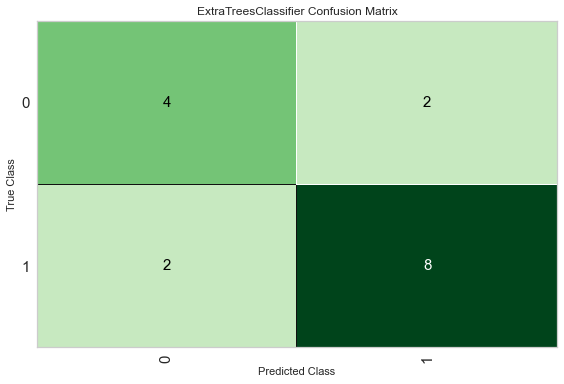

In [87]:
plot_model(tuned_best, plot = 'confusion_matrix')

### Mapa de decisión

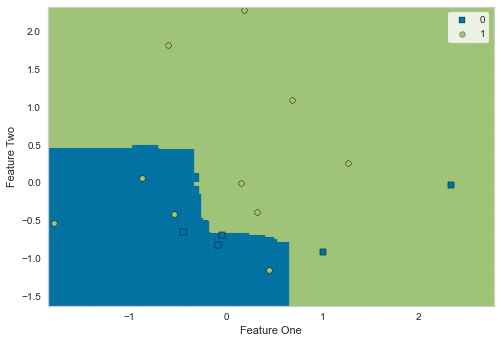

In [88]:
plot_model(tuned_best, plot='boundary')

### Error

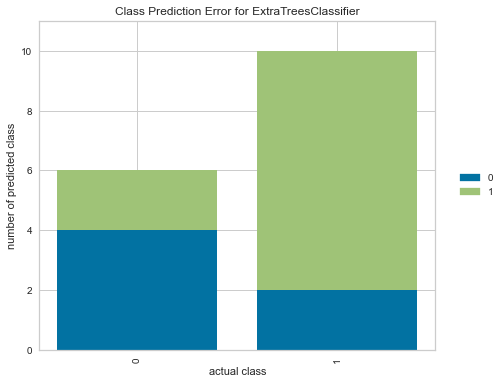

In [89]:
plot_model(tuned_best, plot = 'error')

### Seleccionar dinámicamente las gráficas

In [90]:
evaluate_model(tuned_best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 6.0 Predicción en el conjunto de entrenamiento

In [91]:
predict_model(tuned_best);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7500,0.8000,0.8000,0.8000,0.8000,0.4667,0.4667


In [92]:
predict_model(tuned_second);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.7500,0.7500,0.7000,0.8750,0.7778,0.5000,0.5164


In [137]:
predict_model(tuned_third);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6875,0.8083,0.7000,0.7778,0.7368,0.3548,0.3578


# 7.0 Entrenaremos sobre el 100% de los datos ya que el modelo fue afinado y está listo para producción

In [94]:
final_best = finalize_model(tuned_best)

In [95]:
final_second = finalize_model(tuned_second)

In [138]:
final_third = finalize_model(tuned_third)

In [97]:
#Final K Nearest Neighbour parameters for deployment
print(final_best)

ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                     criterion='entropy', max_depth=7, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.05, min_impurity_split=None,
                     min_samples_leaf=4, min_samples_split=9,
                     min_weight_fraction_leaf=0.0, n_estimators=230, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


# 8.0 Serializamos el modelo

In [103]:
from datetime import date

today = date.today()
now = datetime.now()

d1 = today.strftime("%d/%m/%Y")
print(d1)

10/11/2020


In [106]:
save_model(final_best,'best')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['end_of_fade_in',
                                                        'start_of_fade_out',
                                                        'mode_confidence',
                                                        'key_confidence',
                                                        'time_signature',
                                                        'time_signature_confidence',
                                                        'year', 'duration_ms',
                                                        'Points', 'Country'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                          

In [107]:
save_model(final_second,'second')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['end_of_fade_in',
                                                        'start_of_fade_out',
                                                        'mode_confidence',
                                                        'key_confidence',
                                                        'time_signature',
                                                        'time_signature_confidence',
                                                        'year', 'duration_ms',
                                                        'Points', 'Country'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                          

In [139]:
save_model(final_third,'third')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['end_of_fade_in',
                                                        'start_of_fade_out',
                                                        'mode_confidence',
                                                        'key_confidence',
                                                        'time_signature',
                                                        'time_signature_confidence',
                                                        'year', 'duration_ms',
                                                        'Points', 'Country'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                          

(TIP : It's always good to use date in the filename when saving models, it's good for version control.)

# 9.0 Cargamos el modelo serializado

In [115]:
saved_best = load_model('best')

Transformation Pipeline and Model Successfully Loaded


In [116]:
saved_second = load_model('second')

Transformation Pipeline and Model Successfully Loaded


In [140]:
saved_third = load_model('third')

Transformation Pipeline and Model Successfully Loaded


# 10.0 Vamos a traer datos que no ha visto nunca el modelo ya que son los que buscamos predecir. Los datos de JESC 2020 analizados por Spotify API

Evidentenemtnte estos datos no contienen la puntuación, ya que es lo que buscamos predecir

In [118]:
data_unseen=pd.read_csv("final.csv")
data_unseen

,duration,key,loudness,mode,tempo,artist_hotttnesss,end_of_fade_in,start_of_fade_out,mode_confidence,key_confidence,...,popularity,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms,Country
0,181.99773,7,-9.342,0,95.001,0.23,0.00000,178.39311,0.873,0.876,...,35,0.565,0.563,0.0296,0.1310,0.000002,0.2530,0.114,181998,Belarus
1,179.98036,0,-3.938,1,113.932,0.26,0.00000,173.35439,0.636,0.742,...,38,0.758,0.647,0.0419,0.4330,0.000000,0.1720,0.597,179980,France
2,182.60023,2,-7.322,1,113.981,0.18,0.24989,176.25687,0.687,0.619,...,30,0.667,0.405,0.0292,0.5470,0.000000,0.1920,0.329,182600,Germany
3,173.16830,6,-6.834,1,101.021,0.35,0.15116,168.11247,0.768,0.742,...,47,0.611,0.623,0.0367,0.0569,0.000045,0.0930,0.428,173168,Netherlands
4,180.54675,0,-2.799,1,122.028,0.31,0.00000,173.85940,0.490,0.546,...,43,0.523,0.851,0.0373,0.0148,0.000001,0.2920,0.181,180547,Poland
5,177.33333,8,-6.671,1,180.020,0.15,0.00000,169.28508,0.311,0.507,...,26,0.258,0.499,0.0377,0.4550,0.000000,0.0773,0.428,177333,Russia
6,167.98611,6,-6.184,0,100.040,0.30,2.61805,162.60934,0.379,0.062,...,42,0.744,0.574,0.1670,0.0555,0.000000,0.0817,0.353,167986,Spain
7,157.90765,11,-7.370,0,153.369,0.19,0.53991,152.74086,0.655,0.696,...,31,0.359,0.497,0.0439,0.4360,0.000000,0.0787,0.328,157908,Ukraine


### Vemos las columnas para tener mayor transparencia en este conjunto de datos que deseamos predecir

In [119]:
data_unseen.columns

Index(['duration', 'key', 'loudness', 'mode', 'tempo', 'artist_hotttnesss',
       'end_of_fade_in', 'start_of_fade_out', 'mode_confidence',
       'key_confidence', 'time_signature', 'time_signature_confidence', 'year',
       'popularity', 'danceability', 'energy', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'duration_ms', 'Country'],
      dtype='object')

In [120]:
new_prediction = predict_model(saved_best, data=data_unseen)

In [121]:
new_prediction2 = predict_model(saved_second, data=data_unseen)

In [141]:
new_prediction3 = predict_model(saved_third, data=data_unseen)

## Esta función predice la etiqueta y el "Score" (probabilidad de la clase predicha) utilizando un modelo entrenado. 

In [123]:
pd.merge(new_prediction.sort_values(by='Label'),data_unseen['Country'],left_index=True,right_index=True).sort_values(by=['Label'],ascending=False)

,duration,key,loudness,mode,tempo,artist_hotttnesss,popularity,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,Label,Score,Country
0,181.99773,7,-9.342,0,95.001,0.23,35,0.565,0.563,0.0296,0.1310,0.000002,0.2530,0.114,Good,0.5189,Belarus
1,179.98036,0,-3.938,1,113.932,0.26,38,0.758,0.647,0.0419,0.4330,0.000000,0.1720,0.597,Good,0.5463,France
2,182.60023,2,-7.322,1,113.981,0.18,30,0.667,0.405,0.0292,0.5470,0.000000,0.1920,0.329,Good,0.5203,Germany
3,173.16830,6,-6.834,1,101.021,0.35,47,0.611,0.623,0.0367,0.0569,0.000045,0.0930,0.428,Good,0.5298,Netherlands
4,180.54675,0,-2.799,1,122.028,0.31,43,0.523,0.851,0.0373,0.0148,0.000001,0.2920,0.181,Good,0.5356,Poland
6,167.98611,6,-6.184,0,100.040,0.30,42,0.744,0.574,0.1670,0.0555,0.000000,0.0817,0.353,Good,0.5018,Spain
5,177.33333,8,-6.671,1,180.020,0.15,26,0.258,0.499,0.0377,0.4550,0.000000,0.0773,0.428,Bad,0.5162,Russia
7,157.90765,11,-7.370,0,153.369,0.19,31,0.359,0.497,0.0439,0.4360,0.000000,0.0787,0.328,Bad,0.5148,Ukraine


In [124]:
pd.merge(new_prediction2.sort_values(by='Label'),data_unseen['Country'],left_index=True,right_index=True).sort_values(by=['Label','Score'],ascending=False)

,duration,key,loudness,mode,tempo,artist_hotttnesss,popularity,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,Label,Score,Country
2,182.60023,2,-7.322,1,113.981,0.18,30,0.667,0.405,0.0292,0.5470,0.000000,0.1920,0.329,Good,0.7354,Germany
1,179.98036,0,-3.938,1,113.932,0.26,38,0.758,0.647,0.0419,0.4330,0.000000,0.1720,0.597,Good,0.7352,France
0,181.99773,7,-9.342,0,95.001,0.23,35,0.565,0.563,0.0296,0.1310,0.000002,0.2530,0.114,Good,0.7085,Belarus
4,180.54675,0,-2.799,1,122.028,0.31,43,0.523,0.851,0.0373,0.0148,0.000001,0.2920,0.181,Good,0.6512,Poland
3,173.16830,6,-6.834,1,101.021,0.35,47,0.611,0.623,0.0367,0.0569,0.000045,0.0930,0.428,Good,0.6321,Netherlands
6,167.98611,6,-6.184,0,100.040,0.30,42,0.744,0.574,0.1670,0.0555,0.000000,0.0817,0.353,Good,0.5136,Spain
5,177.33333,8,-6.671,1,180.020,0.15,26,0.258,0.499,0.0377,0.4550,0.000000,0.0773,0.428,Bad,0.5403,Russia
7,157.90765,11,-7.370,0,153.369,0.19,31,0.359,0.497,0.0439,0.4360,0.000000,0.0787,0.328,Bad,0.5368,Ukraine


In [142]:
pd.merge(new_prediction3.sort_values(by='Label'),data_unseen['Country'],left_index=True,right_index=True).sort_values(by=['Label'],ascending=False)

,duration,key,loudness,mode,tempo,artist_hotttnesss,popularity,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,Label,Score,Country
0,181.99773,7,-9.342,0,95.001,0.23,35,0.565,0.563,0.0296,0.1310,0.000002,0.2530,0.114,Good,0.5704,Belarus
1,179.98036,0,-3.938,1,113.932,0.26,38,0.758,0.647,0.0419,0.4330,0.000000,0.1720,0.597,Good,0.8428,France
2,182.60023,2,-7.322,1,113.981,0.18,30,0.667,0.405,0.0292,0.5470,0.000000,0.1920,0.329,Good,0.5827,Germany
3,173.16830,6,-6.834,1,101.021,0.35,47,0.611,0.623,0.0367,0.0569,0.000045,0.0930,0.428,Good,0.8023,Netherlands
4,180.54675,0,-2.799,1,122.028,0.31,43,0.523,0.851,0.0373,0.0148,0.000001,0.2920,0.181,Good,0.8072,Poland
6,167.98611,6,-6.184,0,100.040,0.30,42,0.744,0.574,0.1670,0.0555,0.000000,0.0817,0.353,Good,0.5771,Spain
5,177.33333,8,-6.671,1,180.020,0.15,26,0.258,0.499,0.0377,0.4550,0.000000,0.0773,0.428,Bad,0.6737,Russia
7,157.90765,11,-7.370,0,153.369,0.19,31,0.359,0.497,0.0439,0.4360,0.000000,0.0787,0.328,Bad,0.6743,Ukraine


- Vemos entonces que la mejor canción según el modelo es Holanda, Francia, Bielorusia y Polonia.
- Las peores serían Alemania, Rusia, España y Ukrania

In [166]:
blender_specific=blend_models(estimator_list=compare_models(n_select=5),method='soft')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6083,0.7250,0.5500,0.6833,0.5733,0.2000,0.2423,1.0330
rf,Random Forest Classifier,0.6000,0.7500,0.6000,0.6500,0.5833,0.2500,0.3000,0.9740
dt,Decision Tree Classifier,0.5750,0.6250,0.4500,0.5333,0.4567,0.2100,0.2423,0.0150
svm,SVM - Linear Kernel,0.5667,0.0000,0.6500,0.6333,0.6100,0.0900,0.1000,0.0120
lightgbm,Light Gradient Boosting Machine,0.5667,0.5000,1.0000,0.5667,0.7133,0.0000,0.0000,0.0220
ridge,Ridge Classifier,0.5583,0.0000,0.6000,0.6500,0.6000,0.1000,0.1077,0.0120
lda,Linear Discriminant Analysis,0.5583,0.5750,0.6000,0.6500,0.6000,0.1000,0.1077,0.0170
catboost,CatBoost Classifier,0.5417,0.6250,0.5000,0.5833,0.5067,0.1100,0.1423,2.6340
lr,Logistic Regression,0.5333,0.5750,0.6000,0.6000,0.5833,0.0500,0.0500,0.0160
nb,Naive Bayes,0.5250,0.4750,0.5000,0.6500,0.5333,0.1000,0.1077,0.0140


TypeError: Estimator list contains estimator SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False) that doesn't support probabilities and method is forced to 'soft'. Either change the method or drop the estimator.

In [159]:
blender_tuned=blend_models(estimator_list=[tuned_best,tuned_second,tuned_third],method='soft',choose_better=True,optimize='Precision')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5000,0.7500,0.5000,0.5000,0.5000,0.0000,0.0000
1,0.7500,0.5000,0.5000,1.0000,0.6667,0.5000,0.5774
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.6667,1.0000,1.0000,0.5000,0.6667,0.4000,0.5000
4,0.6667,0.5000,0.5000,1.0000,0.6667,0.4000,0.5000
5,0.0000,0.0000,0.0000,0.0000,0.0000,-0.8000,-1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.3333,0.0000,0.5000,0.5000,0.5000,-0.5000,-0.5000
8,0.3333,0.0000,0.5000,0.5000,0.5000,-0.5000,-0.5000
9,0.6667,1.0000,0.5000,1.0000,0.6667,0.4000,0.5000


In [160]:
predict_model(blender_tuned);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7500,0.8000,0.8000,0.8000,0.8000,0.4667,0.4667


In [161]:
final_blend = finalize_model(blender_tuned)

In [162]:
new_prediction4 = predict_model(final_blend, data=data_unseen)

In [163]:
final=pd.merge(new_prediction4.sort_values(by='Label'),data_unseen['Country'],left_index=True,right_index=True).sort_values(by=['Label'],ascending=False)

In [164]:
final

,duration,key,loudness,mode,tempo,artist_hotttnesss,popularity,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,Label,Score,Country
0,181.99773,7,-9.342,0,95.001,0.23,35,0.565,0.563,0.0296,0.1310,0.000002,0.2530,0.114,Good,0.5189,Belarus
1,179.98036,0,-3.938,1,113.932,0.26,38,0.758,0.647,0.0419,0.4330,0.000000,0.1720,0.597,Good,0.5463,France
2,182.60023,2,-7.322,1,113.981,0.18,30,0.667,0.405,0.0292,0.5470,0.000000,0.1920,0.329,Good,0.5203,Germany
3,173.16830,6,-6.834,1,101.021,0.35,47,0.611,0.623,0.0367,0.0569,0.000045,0.0930,0.428,Good,0.5298,Netherlands
4,180.54675,0,-2.799,1,122.028,0.31,43,0.523,0.851,0.0373,0.0148,0.000001,0.2920,0.181,Good,0.5356,Poland
6,167.98611,6,-6.184,0,100.040,0.30,42,0.744,0.574,0.1670,0.0555,0.000000,0.0817,0.353,Good,0.5018,Spain
5,177.33333,8,-6.671,1,180.020,0.15,26,0.258,0.499,0.0377,0.4550,0.000000,0.0773,0.428,Bad,0.5162,Russia
7,157.90765,11,-7.370,0,153.369,0.19,31,0.359,0.497,0.0439,0.4360,0.000000,0.0787,0.328,Bad,0.5148,Ukraine


In [165]:
final[['Label','Score','Country']].reset_index(drop=True).sort_values(by=['Label','Score'],ascending=False)

,Label,Score,Country
1,Good,0.5463,France
4,Good,0.5356,Poland
3,Good,0.5298,Netherlands
2,Good,0.5203,Germany
0,Good,0.5189,Belarus
5,Good,0.5018,Spain
6,Bad,0.5162,Russia
7,Bad,0.5148,Ukraine


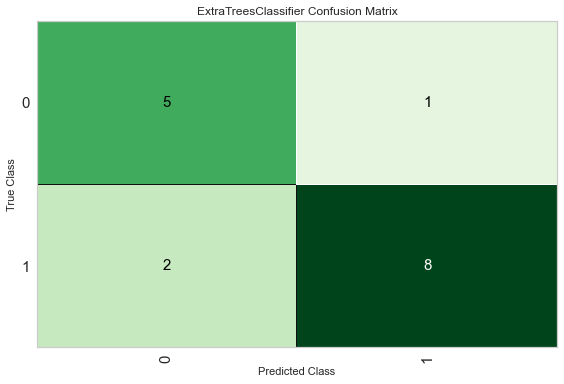

In [158]:
plot_model(final_blend, plot = 'confusion_matrix',use_train_data=False)